In [1]:
import pandas
import numpy as np
import uproot
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
file_name = '../../../tuples/results/DY_amcatnloFXFX_part1.root'
#file_name = '../../../tuples/results/TTTo2L2Nu_test_part1.root'
#file_name = '../../../tuples/results/TTToHadronic_PSweights_part1.root'
#file_name = '../../../tuples/results/TTToSemiLeptonic_PSweights_part1.root'
file = uproot.open(file_name)

In [13]:
df = file['taus'].arrays(outputtype=pandas.DataFrame)
df.columns = [ c.decode('utf-8') for c in df.columns ]

In [4]:
df_taus = df[df['gen_tau'] == True].copy(deep=True)

In [8]:
df_taus.shape

(219199, 20)

In [9]:
df = df.append(df_taus)

In [14]:
presel = (df['pt'] > 20) & (np.abs(df['eta']) < 2.3)

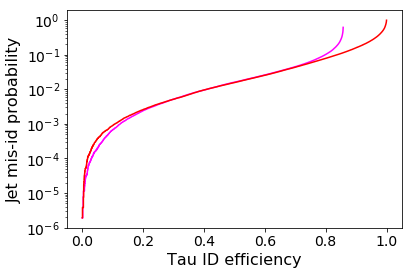

In [15]:
df_tj = df[((df['gen_tau'] == True) | (df['gen_jet'] == True)) & presel]
fpr_ref, tpr_ref, thresholds_ref = metrics.roc_curve(df_tj['gen_tau'], df_tj['refId_jet'])
pred = df_tj['deepId_tau'] / (df_tj['deepId_tau'] + df_tj['deepId_jet'])
fpr, tpr, thresholds = metrics.roc_curve(df_tj['gen_tau'], pred)
plt.semilogy(tpr_ref[:-1], fpr_ref[:-1], 'magenta', tpr, fpr, 'red')
#plt.ylim([0,0.2])
#plt.xlim([.4, 0.8])
plt.xlabel('Tau ID efficiency', fontsize=16)
plt.ylabel('Jet mis-id probability', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('tau_vs_jet.pdf', bbox_inches='tight')

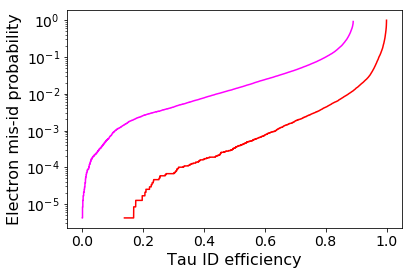

In [46]:
df_et = df[((df['gen_tau'] == True) | (df['gen_e'] == True)) & presel]
fpr_ref, tpr_ref, thresholds_ref = metrics.roc_curve(df_et['gen_tau'], df_et['refId_e'])
pred = df_et['deepId_tau'] / (df_et['deepId_tau'] + df_et['deepId_e'])
fpr, tpr, thresholds = metrics.roc_curve(df_et['gen_tau'], pred)
plt.semilogy(tpr_ref[:-1], fpr_ref[:-1], 'magenta', tpr, fpr, 'red')
#plt.ylim([0,0.2])
#plt.xlim([.4, 0.8])
plt.xlabel('Tau ID efficiency', fontsize=16)
plt.ylabel('Electron mis-id probability', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('tau_vs_ele.pdf', bbox_inches='tight')

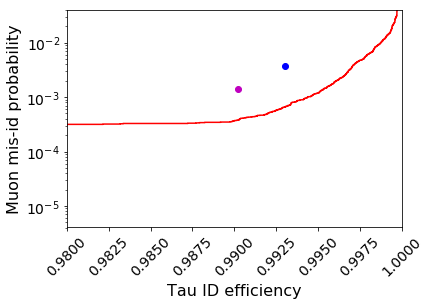

In [47]:
df_mt = df[((df['gen_tau'] == True) | (df['gen_mu'] == True)) & presel]
fpr_ref, tpr_ref, thresholds_ref = metrics.roc_curve(df_mt['gen_tau'], df_mt['refId_mu_loose'])
fpr_ref_2, tpr_ref_2, thresholds_ref_2 = metrics.roc_curve(df_mt['gen_tau'], df_mt['refId_mu_tight'])
pred = df_mt['deepId_tau'] / (df_mt['deepId_tau'] + df_mt['deepId_mu'])
fpr, tpr, thresholds = metrics.roc_curve(df_mt['gen_tau'], pred)
plt.semilogy(tpr_ref[1:2], fpr_ref[1:2], 'bo', tpr_ref_2[1:2], fpr_ref_2[1:2], 'mo', tpr, fpr, 'red')
plt.ylim([0., 0.04])
plt.xlim([.98, 1])
plt.xlabel('Tau ID efficiency', fontsize=16)
plt.ylabel('Muon mis-id probability', fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.savefig('tau_vs_mu.pdf', bbox_inches='tight')